In [1]:
import sys  
sys.path.append("../")

In [2]:
import modules as nn
from initializers import Xavier
from losses import LossMSE as MSE
from activations import *
from utils import *

In [3]:
import torch
torch.set_grad_enabled(False)

In [4]:
import matplotlib.pyplot as plt

In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

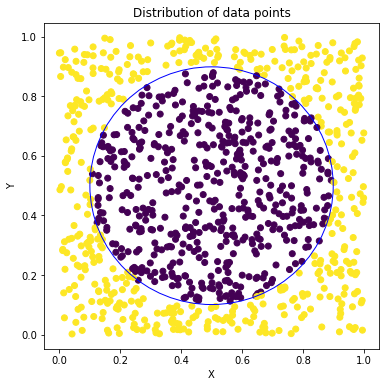

In [5]:
data, labels = get_data(1000)
#Plot the distribution of the generated data, to see how it looks like
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
plt.scatter(data[:,0].tolist(), data[:,1].tolist(), c = labels.tolist())
ax.add_patch(plt.Circle((0.5, 0.5), 1 / (math.sqrt(2*math.pi)), color='b', fill=False))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Distribution of data points")
plt.savefig('disk_data.png')
plt.show()

In [6]:
INPUT_UNITS = 2
HIDDEN_LAYERS = 3
HIDDEN_UNITS = 25
OUTPUT_UNITS = 2

In [7]:
# Generate the data
X_train, y_train = get_data(1000)
X_test, y_test = get_data(1000)

### Training the model and testing it at each epoch:

In [8]:
# Train the model
lrs = [0.01, 0.015, 0.04]
stats = [] 
for lr in lrs:
    print(f"Traininng model with lr={lr}:")
    # The model
    model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                          Sigmoid()
                         )
                            
    _, train_loss, train_acc, test_loss, test_acc = train_test_model(model,X_train,y_train,X_test,y_test,lr=lr)
    stats.append([train_loss, train_acc, test_loss, test_acc])
    print("-"*120)

Traininng model with lr=0.01:
Epoch 1: train loss=0.2913, train acccuracy=48.90% | test loss=0.2490, test acccuracy=49.10%
Epoch 5: train loss=0.2388, train acccuracy=48.90% | test loss=0.2346, test acccuracy=49.10%
Epoch 10: train loss=0.1565, train acccuracy=48.90% | test loss=0.1383, test acccuracy=49.10%
Epoch 15: train loss=0.0651, train acccuracy=55.10% | test loss=0.0543, test acccuracy=55.90%
Epoch 20: train loss=0.0497, train acccuracy=65.80% | test loss=0.0545, test acccuracy=63.30%
Epoch 25: train loss=0.0444, train acccuracy=71.90% | test loss=0.0440, test acccuracy=72.60%
Epoch 30: train loss=0.0391, train acccuracy=75.40% | test loss=0.0390, test acccuracy=75.50%
Epoch 35: train loss=0.0340, train acccuracy=77.30% | test loss=0.0390, test acccuracy=78.20%
Epoch 40: train loss=0.0324, train acccuracy=79.20% | test loss=0.0296, test acccuracy=78.10%
Epoch 45: train loss=0.0297, train acccuracy=80.50% | test loss=0.0275, test acccuracy=78.90%
Epoch 50: train loss=0.0313, tra

Epoch 110: train loss=0.0255, train acccuracy=85.90% | test loss=0.0373, test acccuracy=84.40%
Epoch 115: train loss=0.0219, train acccuracy=85.50% | test loss=0.0306, test acccuracy=82.50%
Epoch 120: train loss=0.0254, train acccuracy=84.60% | test loss=0.0421, test acccuracy=79.90%
Epoch 125: train loss=0.0252, train acccuracy=85.10% | test loss=0.0277, test acccuracy=82.00%
Epoch 130: train loss=0.0252, train acccuracy=83.20% | test loss=0.0635, test acccuracy=83.10%
Epoch 135: train loss=0.0284, train acccuracy=57.70% | test loss=0.0218, test acccuracy=49.60%
Epoch 140: train loss=0.0211, train acccuracy=52.80% | test loss=0.0355, test acccuracy=49.70%
Epoch 145: train loss=0.0223, train acccuracy=83.50% | test loss=0.0409, test acccuracy=65.00%
Epoch 150: train loss=0.0215, train acccuracy=84.60% | test loss=0.0499, test acccuracy=64.10%
------------------------------------------------------------------------------------------------------------------------


### Validation at each epoch (split train data into 70% training and 30% validating):

In [9]:
X_train, y_train, X_val, y_val = split_data(X_train,y_train)

In [10]:
val_stats = [] 
for lr in lrs:
    print(f"Traininng model with lr={lr}:")
    # The model (initalize weights)
    model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                          Sigmoid()
                         )
                            
    _, train_loss, train_acc, val_loss, val_acc = train_model(model,X_train,y_train,X_val,y_val,lr=lr)
    val_stats.append([train_loss, train_acc, val_loss, val_acc])
    print("-"*120)

Traininng model with lr=0.01:
Epoch 1: train loss=0.3700, train acccuracy=48.86% | validation loss=0.1094, validation acccuracy=49.33%
Epoch 5: train loss=0.2492, train acccuracy=48.71% | validation loss=0.1070, validation acccuracy=49.33%
Epoch 10: train loss=0.2449, train acccuracy=48.71% | validation loss=0.1051, validation acccuracy=49.33%
Epoch 15: train loss=0.2316, train acccuracy=48.71% | validation loss=0.0986, validation acccuracy=49.33%
Epoch 20: train loss=0.1813, train acccuracy=48.71% | validation loss=0.0763, validation acccuracy=49.33%
Epoch 25: train loss=0.1243, train acccuracy=48.71% | validation loss=0.0465, validation acccuracy=49.33%
Epoch 30: train loss=0.0723, train acccuracy=48.71% | validation loss=0.0268, validation acccuracy=49.33%
Epoch 35: train loss=0.0560, train acccuracy=48.71% | validation loss=0.0217, validation acccuracy=49.33%
Epoch 40: train loss=0.0497, train acccuracy=48.71% | validation loss=0.0170, validation acccuracy=49.33%
Epoch 45: train lo

Epoch 60: train loss=0.0353, train acccuracy=81.29% | validation loss=0.0116, validation acccuracy=86.67%
Epoch 65: train loss=0.0403, train acccuracy=81.43% | validation loss=0.0144, validation acccuracy=87.67%
Epoch 70: train loss=0.0424, train acccuracy=82.43% | validation loss=0.0153, validation acccuracy=89.33%
Epoch 75: train loss=0.0434, train acccuracy=84.00% | validation loss=0.0103, validation acccuracy=88.67%
Epoch 80: train loss=0.0344, train acccuracy=84.57% | validation loss=0.0207, validation acccuracy=92.00%
Epoch 85: train loss=0.0377, train acccuracy=86.43% | validation loss=0.0118, validation acccuracy=89.33%
Epoch 90: train loss=0.0370, train acccuracy=85.71% | validation loss=0.0105, validation acccuracy=89.67%
Epoch 95: train loss=0.0341, train acccuracy=84.86% | validation loss=0.0131, validation acccuracy=91.33%
Epoch 100: train loss=0.0293, train acccuracy=85.43% | validation loss=0.0092, validation acccuracy=89.67%
Epoch 105: train loss=0.0368, train acccuracy

We can see that the best learning rate is `lr=0.01`, let's train a model given that learning rate and test it.

In [11]:
lr=0.01
model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                          Sigmoid()
                         )
print(f"Training with lr={lr}")
trained_model, train_loss, train_acc, val_loss, val_acc = train_model(model,X_train,y_train,X_val,y_val,
                                                                      lr=lr,verbose=False)

Training with lr=0.01


In [12]:
test_loss, test_acc = test_model(trained_model, X_test, y_test)

Test loss=0.0355, test accuracy=66.80


----

## Torch:

In [13]:
X_train, y_train = get_data(1000)
X_test, y_test = get_data(1000)

In [14]:
torch.set_grad_enabled(True)

In [15]:
# Train the model
torch_stats = []
for lr in lrs:
    print(f"Traininng PyTorch model with lr={lr}:")
    # The model
    torch_model = torch.nn.Sequential(torch.nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                            torch.nn.Sigmoid()
                            )
    _, train_loss, train_acc, test_loss, test_acc = torch_train_test_model(torch_model, X_train, y_train, X_test, y_test)
    torch_stats.append([train_loss, train_acc, test_loss, test_acc])
    print("-"*120)

Traininng PyTorch model with lr=0.01:
Epoch 1: train loss=0.1961, train acccuracy=47.30% | test loss=0.1437, test acccuracy=47.80%
Epoch 5: train loss=0.1250, train acccuracy=46.80% | test loss=0.1249, test acccuracy=47.80%
Epoch 10: train loss=0.1239, train acccuracy=46.80% | test loss=0.1237, test acccuracy=47.80%
Epoch 15: train loss=0.1225, train acccuracy=46.80% | test loss=0.1222, test acccuracy=47.80%
Epoch 20: train loss=0.1196, train acccuracy=46.80% | test loss=0.1189, test acccuracy=47.80%
Epoch 25: train loss=0.1133, train acccuracy=46.80% | test loss=0.1123, test acccuracy=47.80%
Epoch 30: train loss=0.0991, train acccuracy=46.80% | test loss=0.0991, test acccuracy=47.80%
Epoch 35: train loss=0.0710, train acccuracy=46.80% | test loss=0.0756, test acccuracy=47.80%
Epoch 40: train loss=0.0403, train acccuracy=46.80% | test loss=0.0461, test acccuracy=47.80%
Epoch 45: train loss=0.0281, train acccuracy=46.80% | test loss=0.0347, test acccuracy=47.80%
Epoch 50: train loss=0.0

Epoch 110: train loss=0.0134, train acccuracy=72.60% | test loss=0.0185, test acccuracy=71.60%
Epoch 115: train loss=0.0129, train acccuracy=72.90% | test loss=0.0192, test acccuracy=72.00%
Epoch 120: train loss=0.0130, train acccuracy=73.00% | test loss=0.0189, test acccuracy=72.50%
Epoch 125: train loss=0.0127, train acccuracy=73.10% | test loss=0.0190, test acccuracy=72.80%
Epoch 130: train loss=0.0127, train acccuracy=73.50% | test loss=0.0187, test acccuracy=73.10%
Epoch 135: train loss=0.0129, train acccuracy=74.10% | test loss=0.0177, test acccuracy=73.60%
Epoch 140: train loss=0.0123, train acccuracy=74.40% | test loss=0.0185, test acccuracy=73.80%
Epoch 145: train loss=0.0123, train acccuracy=75.10% | test loss=0.0173, test acccuracy=74.50%
Epoch 150: train loss=0.0120, train acccuracy=76.00% | test loss=0.0181, test acccuracy=74.70%
------------------------------------------------------------------------------------------------------------------------


## Visualization:

### Epoch train + test:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
stats_np = np.array(stats)
stats_np.shape

(3, 4, 150)

In [18]:
torch_stats_np = np.array(torch_stats)
torch_stats_np.shape #(lr, [train_loss, train_acc, test_loss, test_acc], epochs)

(3, 4, 150)

In [24]:
def plots_results(results,torch_results,lrs):
    
    lrs_colors = ['b', 'g', 'm']
    
    fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2,figsize= (20,18))
    
    ax1.sharey(ax2)
    ax3.sharey(ax4)
    
    for ind,lr in enumerate(lrs):
        
        ax1.plot(results[ind][0], color = lrs_colors[ind], label = f'training loss with lr={lrs[ind]}')
        ax3.plot(results[ind][1], color = lrs_colors[ind], label = f'training accuracy  with lr={lrs[ind]}')
        
        ax2.plot(torch_results[ind][0], color = lrs_colors[ind], label = f'training loss with lr={lrs[ind]}')
        ax4.plot(torch_results[ind][1], color = lrs_colors[ind], label = f'training accuracy  with lr={lrs[ind]}')
        
        
    ax1.set_title('Training Mean Square Error ',{'fontsize':18})
    ax1.set_xlabel("Epochs",{'fontsize':18})
    ax1.set_ylabel("MSE",{'fontsize':18})
    
    ax2.set_title('(PyTorch) Training Mean Square Error ',{'fontsize':18})
    ax2.set_xlabel("Epochs",{'fontsize':18})
    ax2.set_ylabel("MSE",{'fontsize':18})

    ax3.set_title('Training accuracy ',{'fontsize':18})
    ax3.set_xlabel("Epochs",{'fontsize':18})
    ax3.set_ylabel("Accuracy",{'fontsize':18})

    ax4.set_title('(PyTorch) Training accuracy ',{'fontsize':18})
    ax4.set_xlabel("Epochs",{'fontsize':18})
    ax4.set_ylabel("Accuracy",{'fontsize':18})
    
    ax1.legend(loc = 'upper right',fontsize= 'large')
    ax2.legend(loc = 'upper right',fontsize= 'large')
    ax3.legend(loc = 'upper left',fontsize= 'large')
    ax4.legend(loc = 'upper left',fontsize= 'large')
    plt.tight_layout()
    plt.savefig("results.png")
    plt.show()

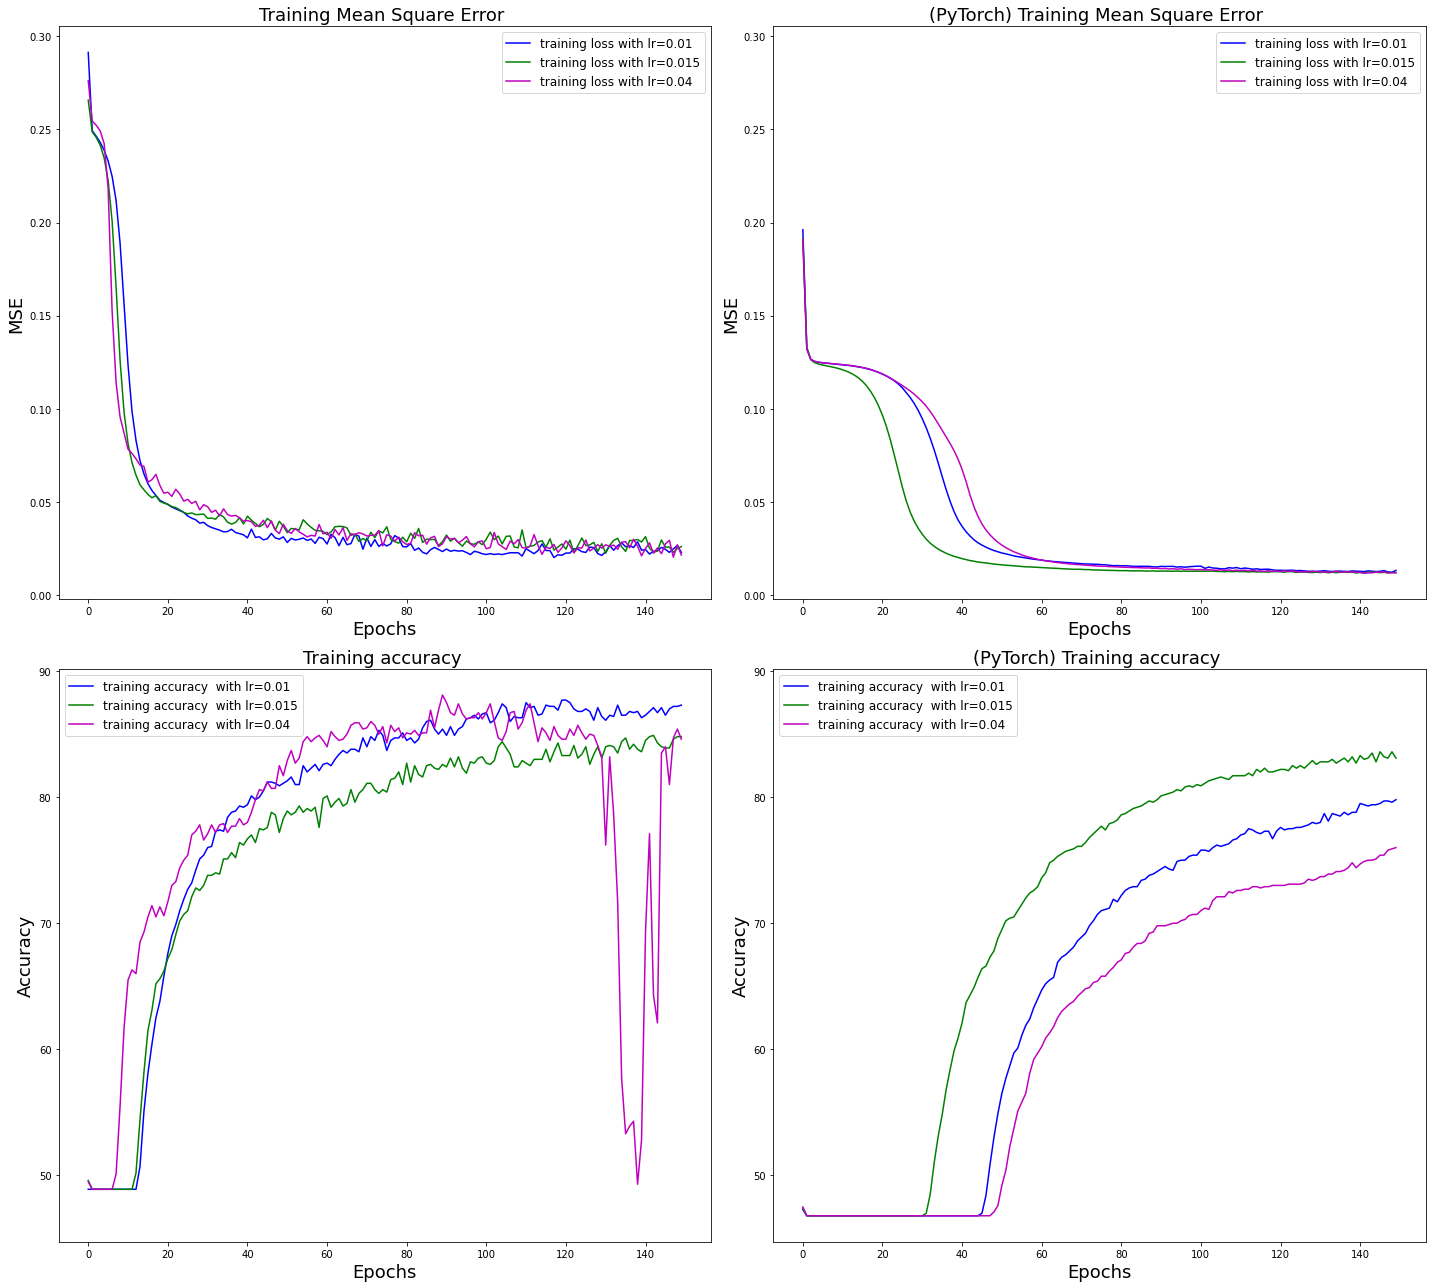

In [25]:
plots_results(stats_np, torch_stats_np,lrs)

### Training withh validation and then testing:

In [26]:
np.array(val_stats).shape

(3, 4, 150)

In [27]:
def val_plots_results(val_stats,lrs):
    # val_stats = [train_loss, train_acc, val_loss, val_acc]
    lrs_colors = ['b', 'g', 'm']
    
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize= (14,8))
    
    for ind,lr in enumerate(lrs):
        
        ax1.plot(val_stats[ind][0], color = lrs_colors[ind], linestyle="dashed", label = f'training loss with lr={lrs[ind]}')
        ax1.plot(val_stats[ind][2], color = lrs_colors[ind], label = f'validation loss with lr={lrs[ind]}')
        
        ax2.plot(val_stats[ind][1], color = lrs_colors[ind], linestyle="dashed", label = f'training accuracy with lr={lrs[ind]}')
        ax2.plot(val_stats[ind][3], color = lrs_colors[ind], label = f'validation accuracy with lr={lrs[ind]}')
        
        
    ax1.set_title('Mean Square Error ',{'fontsize':18})
    ax1.set_xlabel("Epochs",{'fontsize':18})
    ax1.set_ylabel("MSE",{'fontsize':18})
    
    ax2.set_title('Accuracy ',{'fontsize':18})
    ax2.set_xlabel("Epochs",{'fontsize':18})
    ax2.set_ylabel("Accuracy",{'fontsize':18})
    
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper left')

    plt.tight_layout()
    plt.savefig("val_results.png")
    plt.show()

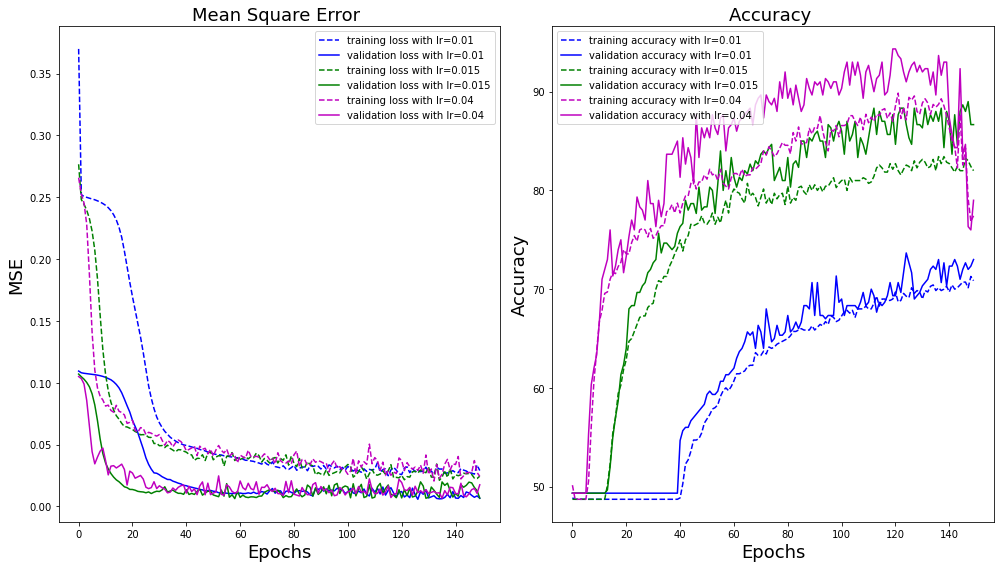

In [28]:
val_plots_results(val_stats,lrs)